In [64]:
import gensim
import numpy as np
import pandas as pd

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import json
warnings.filterwarnings(action = 'ignore')
from gensim.models import Word2Vec

In [10]:
f = open('templates.json')
sample = open("template_APP1.txt","w")
data = json.load(f)
r = len(data)
count = 0

for key,value in data.items():
    sample.write(value)
    count+=1
    if(count==r):
        break
    sample.write("\n")
  
f.close()
sample.close()

In [148]:
sample = open("words.txt","r")
s = sample.read()

f = s.replace("\n", " ")

In [149]:
data = []

for i in sent_tokenize(f):
	temp = []
	
	
	for j in word_tokenize(i):
		temp.append(j.lower())

	data.append(temp)
data

[['words',
  '0.0',
  'start',
  'requestid',
  'version',
  'latest',
  '0.0',
  'info',
  'parsed_message_details',
  'gateway_id',
  'dm_279_5',
  'component_id',
  'alarmtype',
  'timestamp',
  '0.0',
  'info',
  'parsed_message_details',
  'gateway_id',
  'dm_279_5',
  'component_id',
  'alarmtype',
  'timestamp',
  '0.0',
  'info',
  'healthy_component',
  '0.0',
  'info',
  'parsed_message_details',
  'gateway_id',
  'dm_279_5',
  'component_id',
  'alarmtype',
  'timestamp',
  '0.0',
  'info',
  'healthy_component',
  '0.0',
  'info',
  'existing_redis_values',
  'alarm_type',
  'null',
  'is_alarm_cleared',
  'false',
  '0.0',
  'info',
  'existing_redis_values',
  'alarm_type',
  'null',
  'is_alarm_cleared',
  'false',
  '0.0',
  'info',
  'existing_redis_values',
  'alarm_type',
  'null',
  'is_alarm_cleared',
  'false',
  '0.0',
  'info',
  'parsed_message_details',
  'gateway_id',
  'dm_279_5',
  'component_id',
  'alarmtype',
  'timestamp',
  '0.0',
  'info',
  'healthy_

In [184]:
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)

In [185]:
print(model1)

Word2Vec<vocab=2015, vector_size=100, alpha=0.025>


In [186]:
model1.build_vocab(data,progress_per=3000)

In [187]:
model1.epochs

5

In [188]:
model1.train(data,total_examples=model1.corpus_count, epochs= model1.epochs)

(50000, 9466360)

In [189]:
model1.save("CBOW_APP1.model")

In [190]:
model1.wv.most_similar("requestid")

[('latest', 0.9888939261436462),
 ('words', 0.9861441850662231),
 ('dm_233_5', 0.985887348651886),
 ('false', 0.9858037233352661),
 ('start', 0.9838781952857971),
 ('dm_279_5', 0.9780182838439941),
 ('version', 0.9767605066299438),
 ('dm_130_2', 0.9765241146087646),
 ('healthy_component', 0.976184070110321),
 ('invocation_start', 0.973850667476654)]

In [191]:
model1.wv.most_similar("info")

[('alarm_type', 0.940998911857605),
 ('start', 0.9182590246200562),
 ('false', 0.9131596088409424),
 ('existing_redis_values', 0.9122397303581238),
 ('requestid', 0.9113063812255859),
 ('words', 0.9077103734016418),
 ('dm_233_5', 0.9047276973724365),
 ('dm_233_8', 0.8998062014579773),
 ('dm_157', 0.8940072655677795),
 ('timestamp', 0.8904445171356201)]

In [192]:
model1.wv.similarity(w1="requestid",w2="init")

-0.02171306

In [193]:
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg=1)

In [194]:
model2.build_vocab(data,progress_per=1000)

In [195]:
model2.train(data,total_examples=model1.corpus_count, epochs= model1.epochs)

(50000, 9466360)

In [196]:
model2.save("SGRAM_APP1.model")

In [197]:
model2.wv.most_similar("requestid")

[('dm_144', 0.97282874584198),
 ('dm_100_1', 0.972608745098114),
 ('existing_redis_values', 0.9704843759536743),
 ('dm_233_4', 0.9703908562660217),
 ('dm_233_7', 0.9700295329093933),
 ('0.0', 0.9678754806518555),
 ('dm_159_2', 0.9672234058380127),
 ('invocation_start', 0.9671918749809265),
 ('dm_148_1', 0.9663621187210083),
 ('dm_282_2', 0.9650483131408691)]

In [198]:
vec = model1.wv.vectors

In [199]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [200]:
np_arr  = np.unique(data)

In [201]:
len(np_arr)

2015

In [202]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(vec)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [203]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

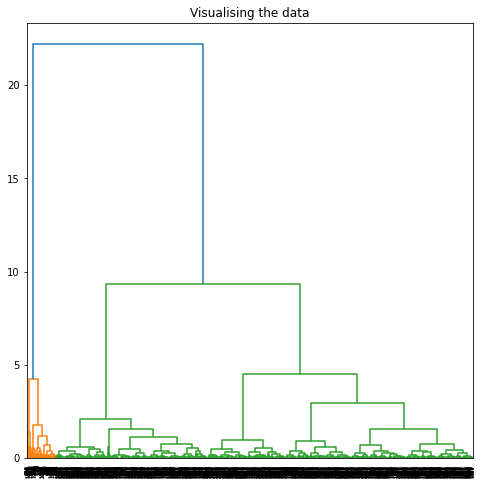

In [204]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [205]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

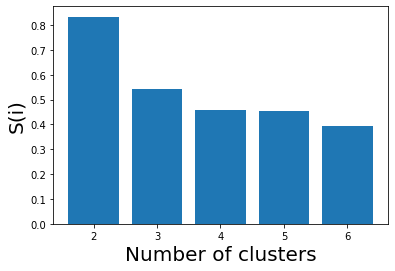

In [206]:
k = [2, 3, 4, 5, 6]
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [214]:
x = silhouette_scores.index(max(silhouette_scores))
ind  = x+2
ind

2

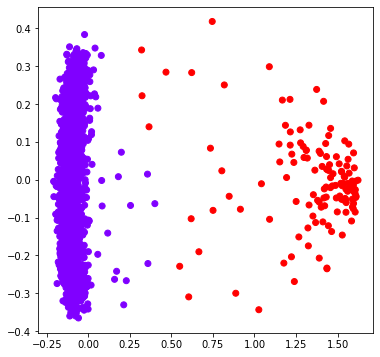

In [215]:
ac = AgglomerativeClustering(n_clusters = ind)
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac.fit_predict(X_principal), cmap ='rainbow')
plt.show()